In [1]:
import numpy as np
import mne as mne
import matplotlib.pyplot as plt

ELECTRODES_NUM = 35
root_folder = r"C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss"

train_ICS = np.load('./data/train_ICS.npy')
train_ICs_left = np.load('./data/train_ICs_left.npy')
train_ICs_right = np.load('./data/train_ICs_right.npy')
train_ICs_no_move = np.load('./data/train_ICs_no_move.npy')
test_ICs = np.load('./data/test_ICs.npy')
train_labels = np.load('./data/train_labels.npy')
test_labels = np.load('./data/test_labels.npy')
test_labels = np.load('./data/test_labels.npy')
train_set = mne.io.read_epochs_eeglab(root_folder + r'\data\train_set.set')
train_set_left = mne.io.read_epochs_eeglab(root_folder + r'\data\train_set_left.set')
train_set_right = mne.io.read_epochs_eeglab(root_folder + r'\data\train_set_right.set')
train_set_no_move = mne.io.read_epochs_eeglab(root_folder + r'\data\train_set_no_move.set')
test_set = mne.io.read_epochs_eeglab(root_folder + r'\data\test_set.set')
eeglab_epochs_with_location = mne.io.read_epochs_eeglab(root_folder + r'\data\35_electrodes_filtered_epoched_with_locations.set')
train_ica = mne.preprocessing.read_ica(root_folder + r'\data\train_ica.fif')
test_ica = mne.preprocessing.read_ica(root_folder + r'\data\test_ica.fif')

Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set.set...
Not setting metadata
368 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set_left.set...
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set_right.set...
Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set_no_move.set...
Not setting metadata
125 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extra

In [2]:
def include_just_one_ic(ics, idx_to_include):
    a = np.zeros(ics.shape)
    a[idx_to_include] = ics[idx_to_include]
    return a

In [3]:
average_in_time_ICs_left = []
for ic in train_ICs_left:
    average_in_time_ICs_left.append(np.mean(ic, axis=0))
average_in_time_ICs_left = np.array(average_in_time_ICs_left)

average_in_time_ICs_right = []
for ic in train_ICs_right:
    average_in_time_ICs_right.append(np.mean(ic, axis=0))
average_in_time_ICs_right = np.array(average_in_time_ICs_right)

average_in_time_ICs_no_move = []
for ic in train_ICs_no_move:
    average_in_time_ICs_no_move.append(np.mean(ic, axis=0))
average_in_time_ICs_no_move = np.array(average_in_time_ICs_no_move)

In [4]:
electrodes_avg_in_time_left = []
electrodes_avg_in_time_right = []
electrodes_avg_in_time_no_move = []
for i in range(ELECTRODES_NUM):
    reduced_ics_left = include_just_one_ic(average_in_time_ICs_left,i)
    reduced_ics_right = include_just_one_ic(average_in_time_ICs_right,i)
    reduced_ics_no_move = include_just_one_ic(average_in_time_ICs_no_move,i)
    electrodes_avg_in_time_left.append(train_ica.mixing_matrix_ @ reduced_ics_left)
    electrodes_avg_in_time_right.append(train_ica.mixing_matrix_ @ reduced_ics_right)
    electrodes_avg_in_time_no_move.append(train_ica.mixing_matrix_ @ reduced_ics_no_move)
    
electrodes_avg_in_time_left = np.array(electrodes_avg_in_time_left)
electrodes_avg_in_time_right = np.array(electrodes_avg_in_time_right)
electrodes_avg_in_time_no_move = np.array(electrodes_avg_in_time_no_move)

C:\Users\alonb\AppData\Local\Temp\ipykernel_1724\1261853525.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows = 3, ncols = TIME_POINTS_NUM, constrained_layout=True)


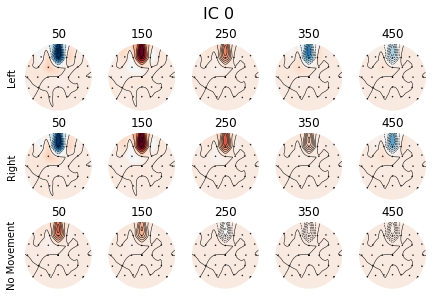

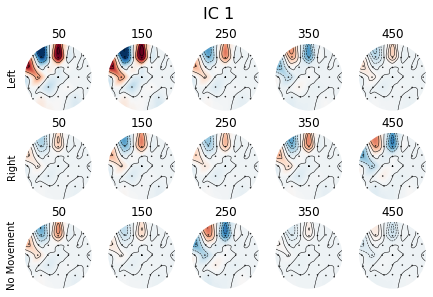

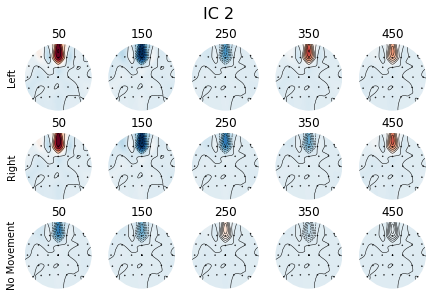

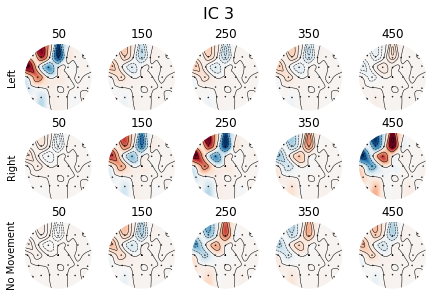

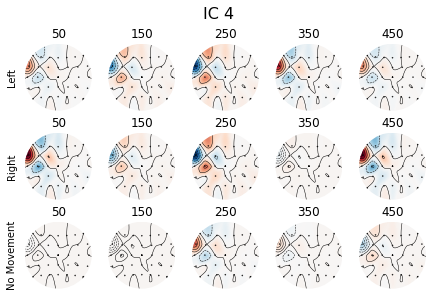

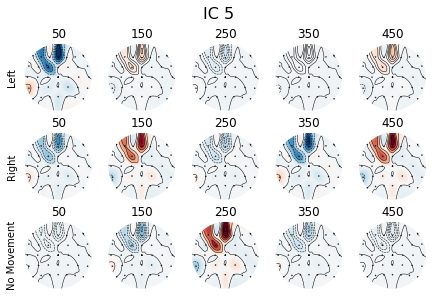

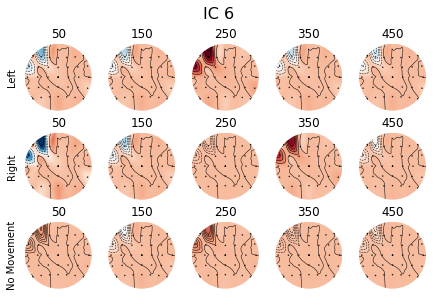

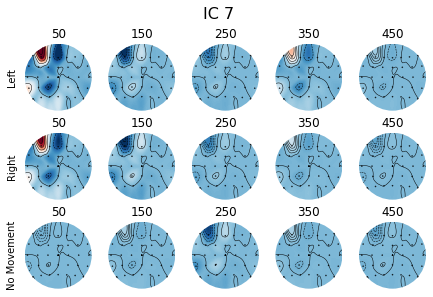

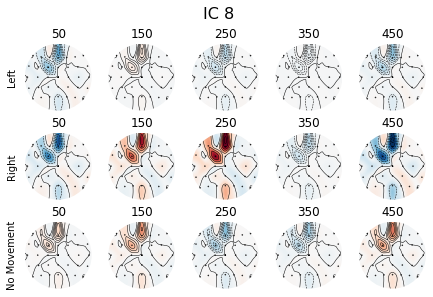

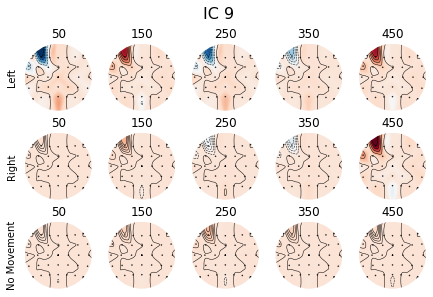

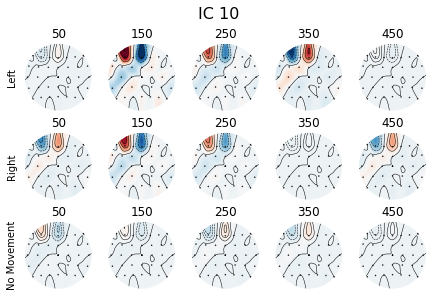

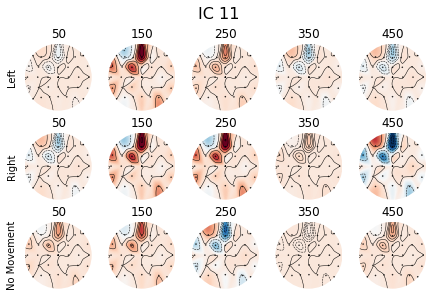

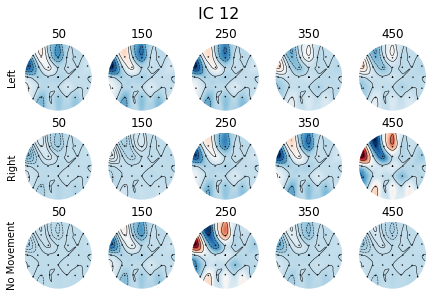

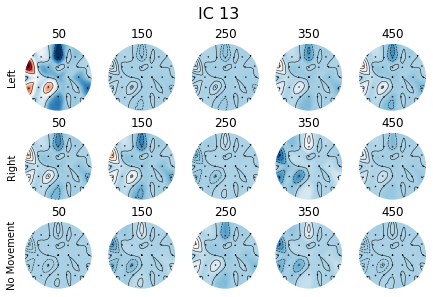

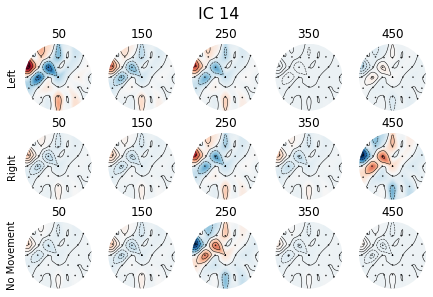

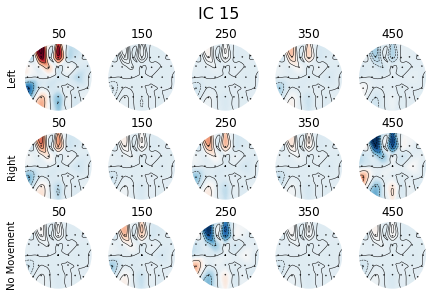

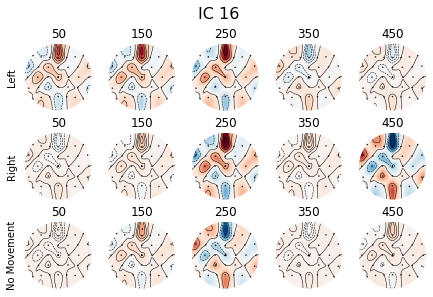

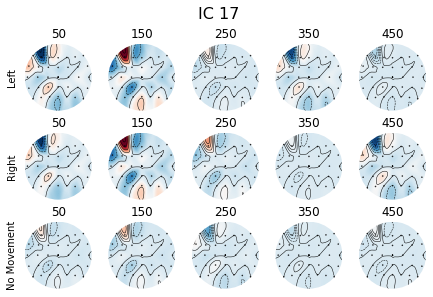

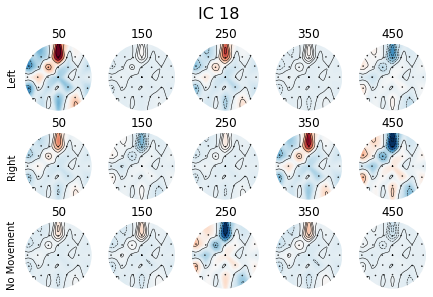

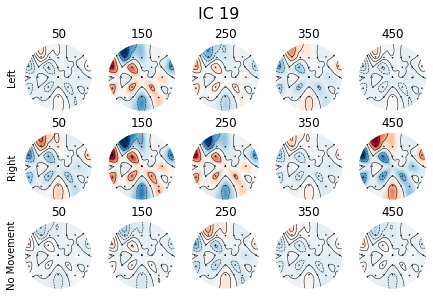

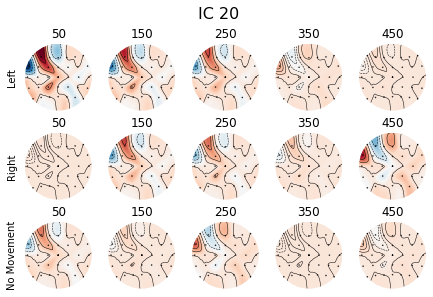

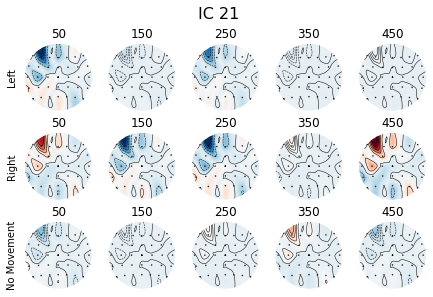

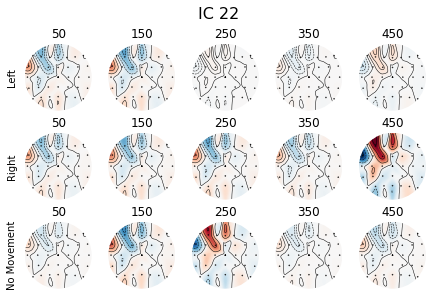

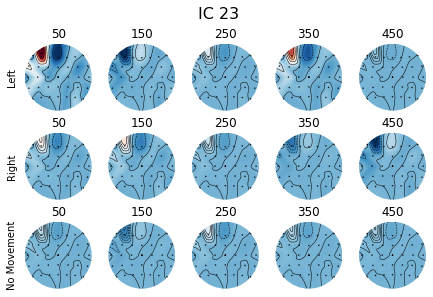

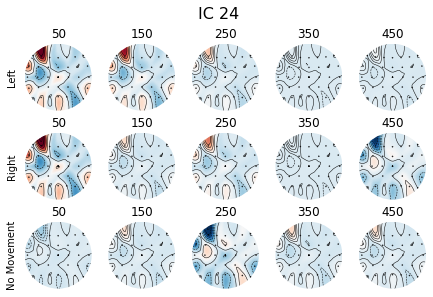

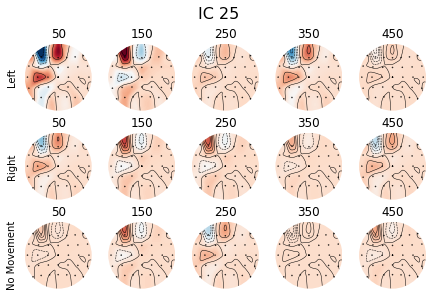

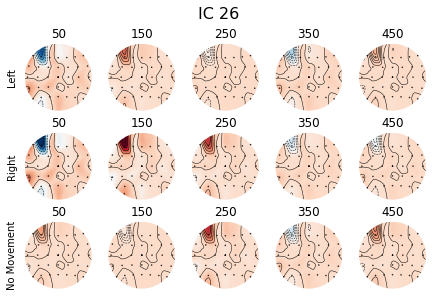

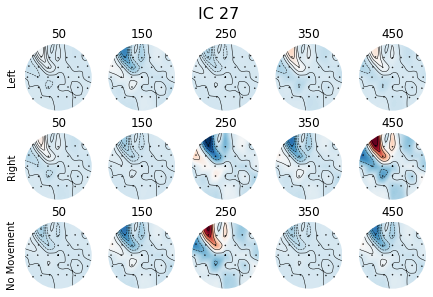

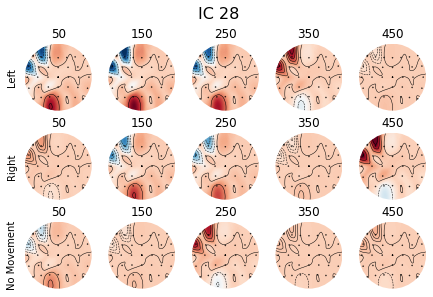

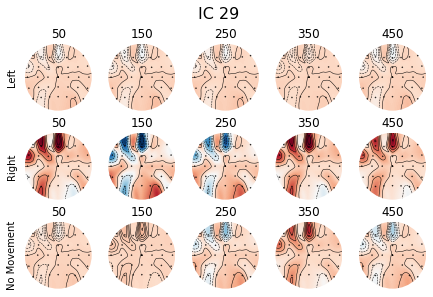

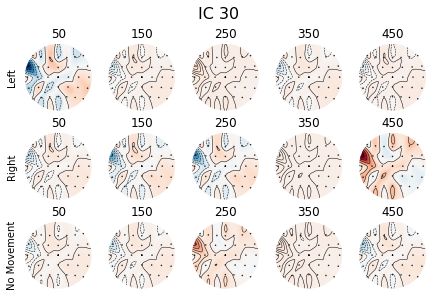

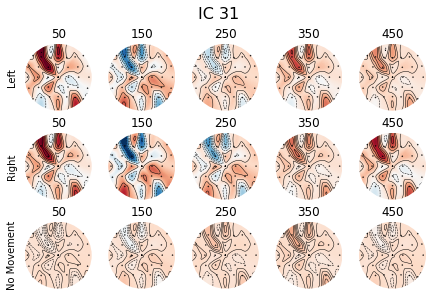

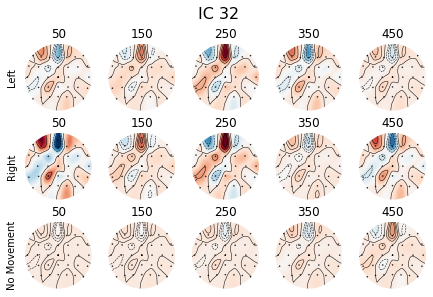

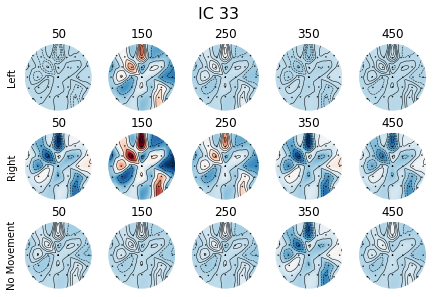

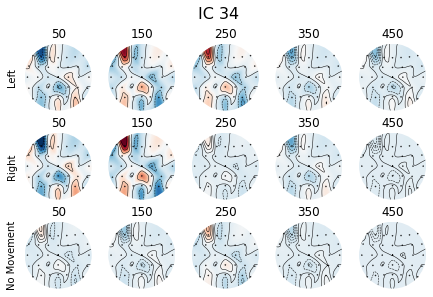

In [8]:
TIME_POINTS_NUM = 5

for ic in range(ELECTRODES_NUM):
    fig, ax = plt.subplots(nrows = 3, ncols = TIME_POINTS_NUM, constrained_layout=True)
    fig.suptitle(f"IC {ic}", fontsize=16)
    ax[0,0].set_ylabel('Left')
    ax[1,0].set_ylabel('Right')
    ax[2,0].set_ylabel('No Movement')
    tmp_time_points = np.array(range(TIME_POINTS_NUM)) * 100 + 50
    voltages = [electrodes_avg_in_time_left[ic,:,tmp_time_points],
                electrodes_avg_in_time_right[ic,:,tmp_time_points],
                electrodes_avg_in_time_no_move[ic,:,tmp_time_points]]
    v_min = np.min(voltages)
    v_max = np.max(voltages)
    for time_point_idx in range(TIME_POINTS_NUM):
        time_point = time_point_idx * 100 + 50
        mne.viz.plot_topomap(electrodes_avg_in_time_left[ic,:,time_point], train_set_left.info, vmin=v_min, vmax=v_max, axes=ax[0,time_point_idx], show=False)
        ax[0,time_point_idx].set_title(str(time_point))
        mne.viz.plot_topomap(electrodes_avg_in_time_right[ic,:,time_point], train_set_right.info, vmin=v_min, vmax=v_max, axes=ax[1,time_point_idx], show=False)
        ax[1,time_point_idx].set_title(str(time_point))
        mne.viz.plot_topomap(electrodes_avg_in_time_no_move[ic,:,time_point], train_set_no_move.info, vmin=v_min, vmax=v_max, axes=ax[2,time_point_idx], show=False)
        ax[2,time_point_idx].set_title(str(time_point))

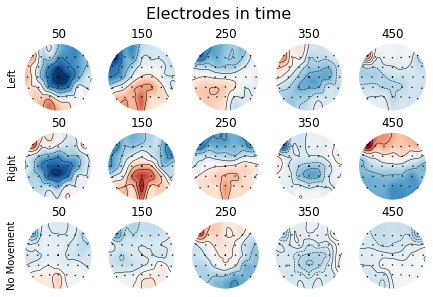

In [10]:
train_set_left_avg_on_trials = np.mean(train_set_left.get_data(), axis=0)
train_set_right_avg_on_trials = np.mean(train_set_right.get_data(), axis=0)
train_set_no_move_avg_on_trials = np.mean(train_set_no_move.get_data(), axis=0)

fig, ax = plt.subplots(nrows = 3, ncols = TIME_POINTS_NUM, constrained_layout=True)
fig.suptitle(f"Electrodes in time", fontsize=16)
ax[0,0].set_ylabel('Left')
ax[1,0].set_ylabel('Right')
ax[2,0].set_ylabel('No Movement')
tmp_time_points = np.array(range(TIME_POINTS_NUM)) * 100 + 50
voltages = [train_set_left_avg_on_trials[:,tmp_time_points],
            train_set_right_avg_on_trials[:,tmp_time_points],
            train_set_no_move_avg_on_trials[:,tmp_time_points]]
v_min = np.min(voltages)
v_max = np.max(voltages)
for time_point_idx in range(TIME_POINTS_NUM):
    time_point = time_point_idx * 100 + 50
    mne.viz.plot_topomap(train_set_left_avg_on_trials[:,time_point], train_set_left.info, vmin=v_min, vmax=v_max, axes=ax[0,time_point_idx], show=False)
    ax[0,time_point_idx].set_title(str(time_point))
    mne.viz.plot_topomap(train_set_right_avg_on_trials[:,time_point], train_set_right.info, vmin=v_min, vmax=v_max, axes=ax[1,time_point_idx], show=False)
    ax[1,time_point_idx].set_title(str(time_point))
    mne.viz.plot_topomap(train_set_no_move_avg_on_trials[:,time_point], train_set_no_move.info, vmin=v_min, vmax=v_max, axes=ax[2,time_point_idx], show=False)
    ax[2,time_point_idx].set_title(str(time_point))

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


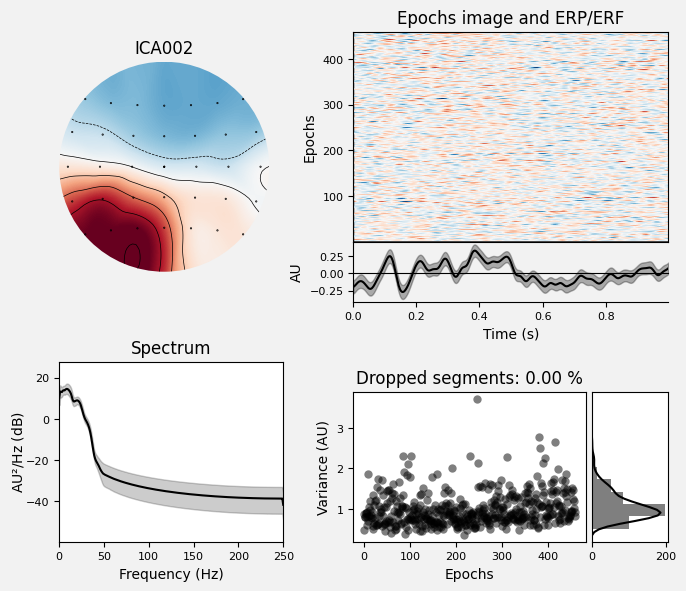

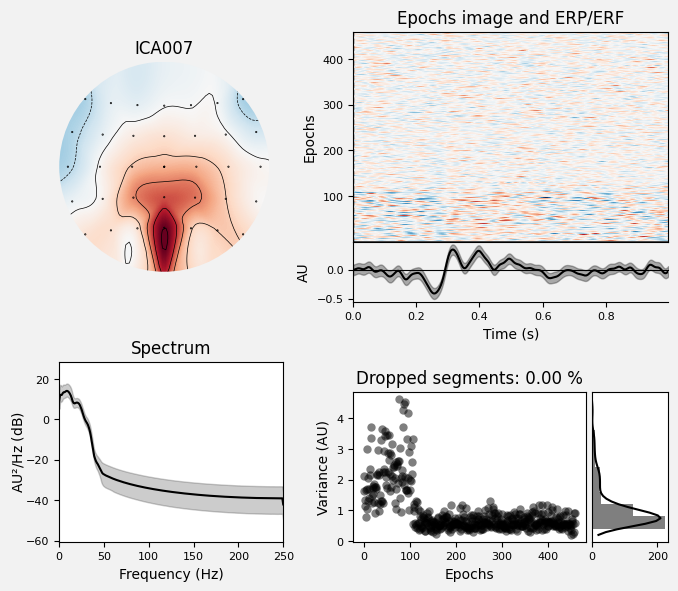

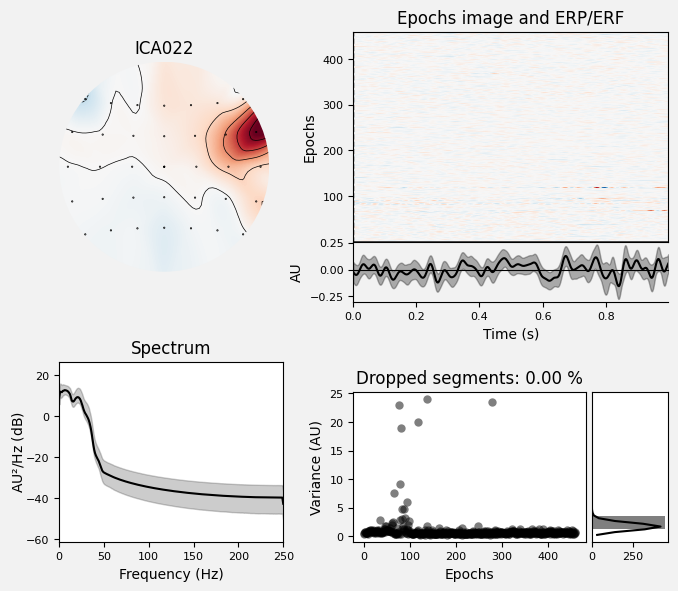

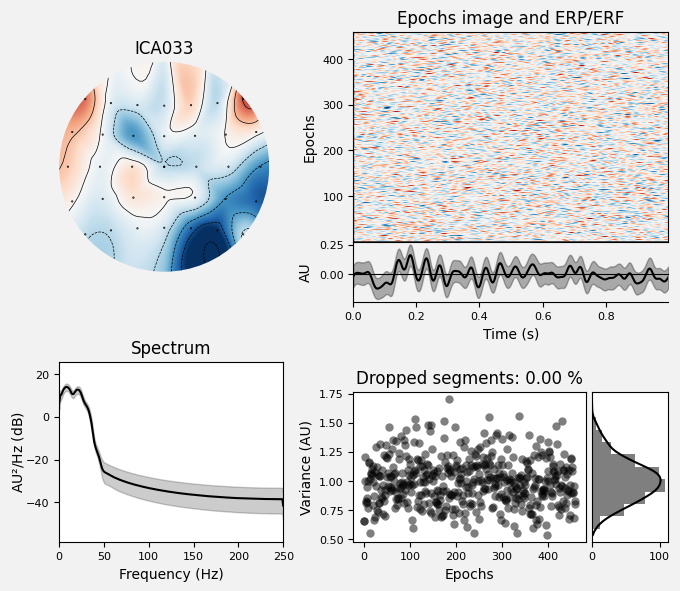

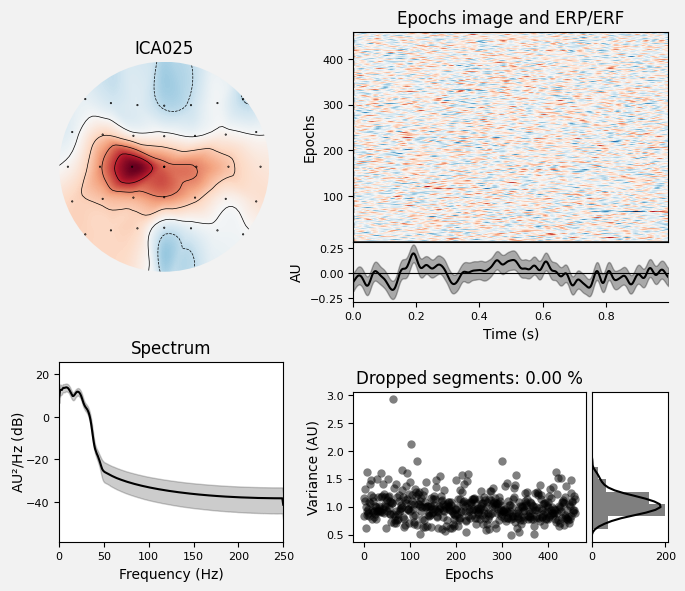

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [14]:
mne.viz.plot_ica_properties(ica, eeglab_epochs_with_location, picks=[2,7,22,33,25] )